# SpaceX Predictive Analysis (Classification)


## 1. Import Libraries and Define Auxiliary Functions


In [1]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing & Model Selection
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

# Metrics
from sklearn.metrics import (
    confusion_matrix, classification_report, roc_auc_score, roc_curve,
    accuracy_score, precision_score, recall_score, f1_score
)

# Utility for plotting confusion matrix
def plot_confusion_matrix(y_true, y_pred, title="Confusion Matrix"):
    cm = confusion_matrix(y_true, y_pred)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title(title)
    ax.xaxis.set_ticklabels(['Did not land', 'Landed'])
    ax.yaxis.set_ticklabels(['Did not land', 'Landed'])
    plt.show()


## 2. Load the Datasets


In [2]:
# Dataset with labels
data = pd.read_csv("dataset_part_2.csv")

# Features
X = pd.read_csv("dataset_part_3.csv")

# Target variable
Y = data['Class']

print("Feature shape:", X.shape)
print("Target distribution:\n", Y.value_counts())

Feature shape: (90, 86)
Target distribution:
 Class
1    60
0    30
Name: count, dtype: int64


## 3. Standardize the Data and Train/Test Split

In [3]:
# Standardize
transform = preprocessing.StandardScaler()
X_scaled = transform.fit_transform(X)

# Train/test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X_scaled, Y, test_size=0.2, random_state=2
)

print("Train size:", X_train.shape[0], "Test size:", X_test.shape[0])


Train size: 72 Test size: 18


## 4. Logistic Regression


LogReg best params: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
LogReg CV accuracy: 0.8071428571428572
LogReg Test accuracy: 0.8333333333333334


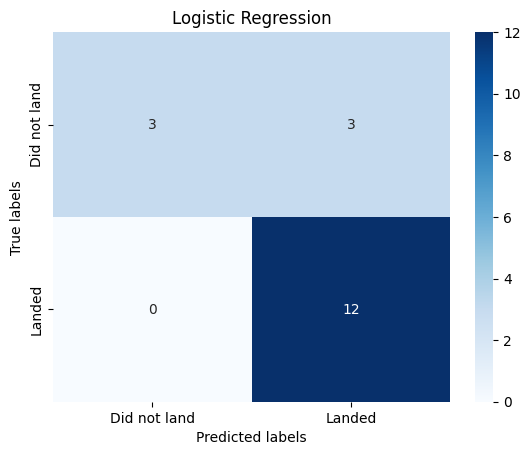

In [4]:
parameters = {"C":[0.01,0.1,1], "penalty":["l2"], "solver":["lbfgs"]}
lr = LogisticRegression()
logreg_cv = GridSearchCV(lr, parameters, cv=10, scoring='accuracy', verbose=0)
logreg_cv.fit(X_train, Y_train)

print("LogReg best params:", logreg_cv.best_params_)
print("LogReg CV accuracy:", logreg_cv.best_score_)
print("LogReg Test accuracy:", logreg_cv.score(X_test, Y_test))

yhat_lr = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_lr, "Logistic Regression")

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## 5. Support Vector Machine

SVM best params: {'C': np.float64(1.0), 'gamma': np.float64(1000.0), 'kernel': 'sigmoid'}
SVM CV accuracy: 0.8482142857142856
SVM Test accuracy: 0.7222222222222222


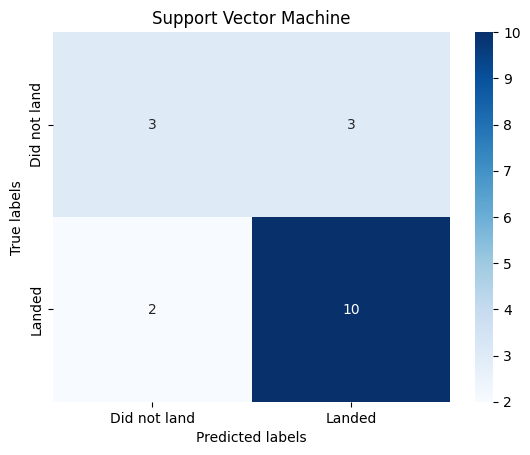

In [5]:
parameters = {
    "kernel": ["linear", "rbf", "poly", "sigmoid"],
    "C": np.logspace(-3, 3, 5),
    "gamma": np.logspace(-3, 3, 5)
}
svm = SVC(probability=True)
svm_cv = GridSearchCV(svm, parameters, cv=10, scoring="accuracy")
svm_cv.fit(X_train, Y_train)

print("SVM best params:", svm_cv.best_params_)
print("SVM CV accuracy:", svm_cv.best_score_)
print("SVM Test accuracy:", svm_cv.score(X_test, Y_test))

yhat_svm = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_svm, "Support Vector Machine")

## 6. Decision Tree

Decision Tree best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Decision Tree CV accuracy: 0.8464285714285715
Decision Tree Test accuracy: 0.7777777777777778


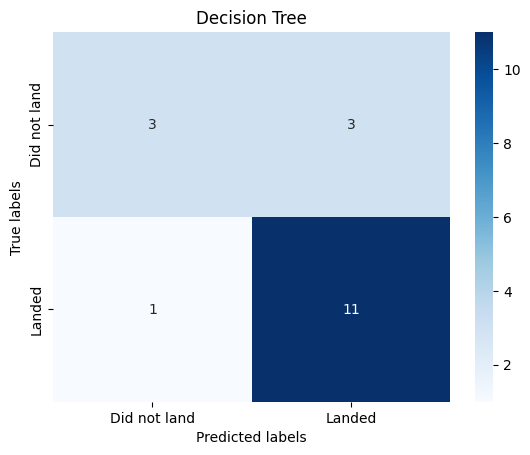

In [6]:
parameters = {
    "criterion": ["gini", "entropy"],
    "splitter": ["best", "random"],
    "max_depth": [2*n for n in range(1, 10)],
    "max_features": ["sqrt"],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 5, 10]
}
tree = DecisionTreeClassifier(random_state=2)
tree_cv = GridSearchCV(tree, parameters, cv=10, scoring="accuracy")
tree_cv.fit(X_train, Y_train)

print("Decision Tree best params:", tree_cv.best_params_)
print("Decision Tree CV accuracy:", tree_cv.best_score_)
print("Decision Tree Test accuracy:", tree_cv.score(X_test, Y_test))

yhat_tree = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_tree, "Decision Tree")

## 7. K-Nearest Neighbors

KNN best params: {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
KNN CV accuracy: 0.8196428571428571
KNN Test accuracy: 0.7777777777777778


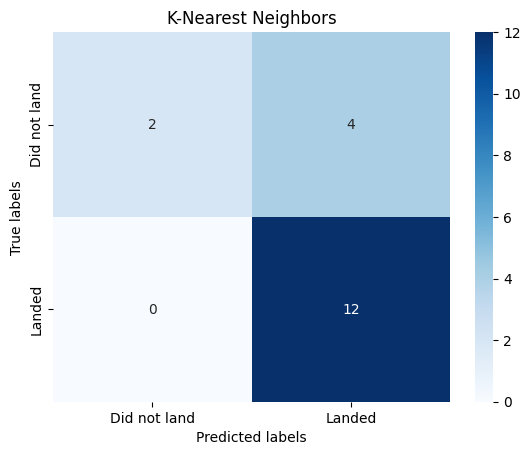

In [7]:
parameters = {
    "n_neighbors": list(range(1, 11)),
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"],
    "p": [1, 2]
}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, parameters, cv=10, scoring="accuracy")
knn_cv.fit(X_train, Y_train)

print("KNN best params:", knn_cv.best_params_)
print("KNN CV accuracy:", knn_cv.best_score_)
print("KNN Test accuracy:", knn_cv.score(X_test, Y_test))

yhat_knn = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_knn, "K-Nearest Neighbors")

## 8. Random Forest

Random Forest best params: {'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
RF CV accuracy: 0.8482142857142858
RF Test accuracy: 0.8333333333333334


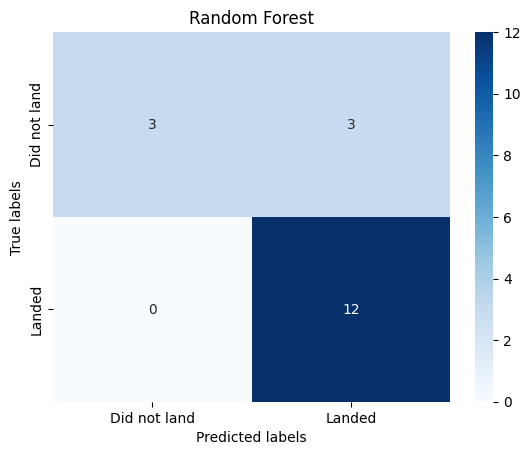

In [8]:
rf = RandomForestClassifier(random_state=2)
rf_params = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10]
}
rf_cv = GridSearchCV(rf, rf_params, cv=10, scoring="accuracy")
rf_cv.fit(X_train, Y_train)

print("Random Forest best params:", rf_cv.best_params_)
print("RF CV accuracy:", rf_cv.best_score_)
print("RF Test accuracy:", rf_cv.score(X_test, Y_test))

yhat_rf = rf_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_rf, "Random Forest")

## 9. Neural Network (MLP)

MLP best params: {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50)}
MLP CV accuracy: 0.7657142857142857
MLP Test accuracy: 0.7777777777777778


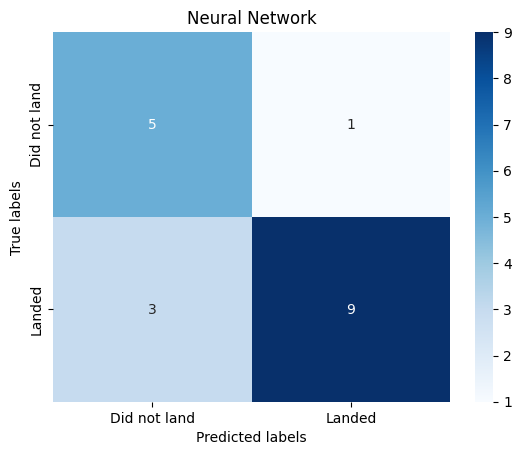

In [9]:
mlp = MLPClassifier(max_iter=500, random_state=2)
mlp_params = {
    "hidden_layer_sizes": [(50,), (100,), (50,50)],
    "activation": ["relu", "tanh"],
    "alpha": [0.0001, 0.001]
}
mlp_cv = GridSearchCV(mlp, mlp_params, cv=5, scoring="accuracy")
mlp_cv.fit(X_train, Y_train)

print("MLP best params:", mlp_cv.best_params_)
print("MLP CV accuracy:", mlp_cv.best_score_)
print("MLP Test accuracy:", mlp_cv.score(X_test, Y_test))

yhat_mlp = mlp_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat_mlp, "Neural Network")

## 10. Naive Bayes

Naive Bayes Test accuracy: 0.7777777777777778


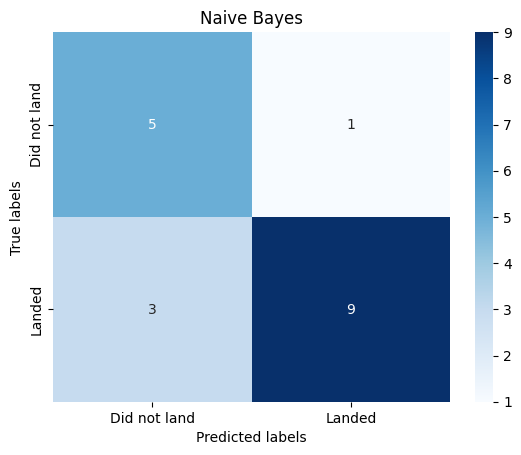

In [10]:
nb = GaussianNB()
nb.fit(X_train, Y_train)
print("Naive Bayes Test accuracy:", nb.score(X_test, Y_test))

yhat_nb = nb.predict(X_test)
plot_confusion_matrix(Y_test, yhat_nb, "Naive Bayes")

## 11. Model Comparison

In [11]:
# Collect results into a table
models = {
    "Logistic Regression": logreg_cv,
    "SVM": svm_cv,
    "Decision Tree": tree_cv,
    "KNN": knn_cv,
    "Random Forest": rf_cv,
    "Neural Net": mlp_cv,
    "Naive Bayes": nb
}

results = []
for name, model in models.items():
    yhat = model.predict(X_test)
    results.append({
        "Model": name,
        "CV Accuracy": model.best_score_ if hasattr(model, "best_score_") else np.nan,
        "Test Accuracy": accuracy_score(Y_test, yhat),
        "Precision": precision_score(Y_test, yhat),
        "Recall": recall_score(Y_test, yhat),
        "F1": f1_score(Y_test, yhat)
    })

results_df = pd.DataFrame(results)
results_df.sort_values(by="Test Accuracy", ascending=False, inplace=True)
results_df.reset_index(drop=True, inplace=True)

display(results_df.style.set_caption("Model Performance Summary"))

,Model,CV Accuracy,Test Accuracy,Precision,Recall,F1
0,Logistic Regression,0.807143,0.833333,0.800000,1.000000,0.888889
1,Random Forest,0.848214,0.833333,0.800000,1.000000,0.888889
2,Decision Tree,0.846429,0.777778,0.785714,0.916667,0.846154
3,Neural Net,0.765714,0.777778,0.900000,0.750000,0.818182
4,KNN,0.819643,0.777778,0.750000,1.000000,0.857143
5,Naive Bayes,nan,0.777778,0.900000,0.750000,0.818182
6,SVM,0.848214,0.722222,0.769231,0.833333,0.800000


## 12. Feature Importance and Interpretability

### 12.1 Logistic Regression (Top 10 features by absolute coefficient)

/tmp/ipython-input-2469547850.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Coefficient", y="Feature", data=top_coef_df, palette="viridis")


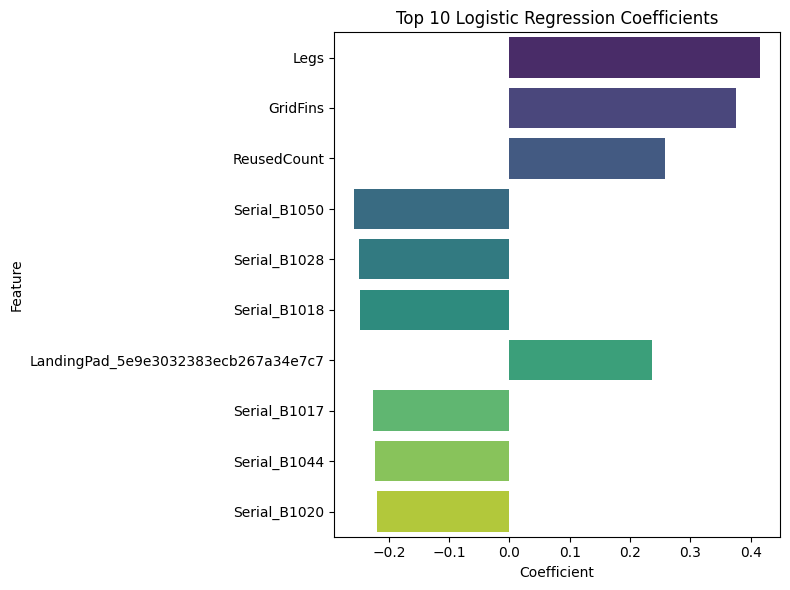

In [12]:
# Logistic Regression coefficients (Top 10 by absolute value)
coef_df = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": logreg_cv.best_estimator_.coef_[0]
})
coef_df["AbsCoef"] = coef_df["Coefficient"].abs()
top_coef_df = coef_df.sort_values(by="AbsCoef", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x="Coefficient", y="Feature", data=top_coef_df, palette="viridis")
plt.title("Top 10 Logistic Regression Coefficients")
plt.tight_layout()
plt.show()

## 12.2 Random Forest (Top 10 features by importance)

/tmp/ipython-input-1071931983.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Importance", y="Feature", data=top_rf_df, palette="magma")


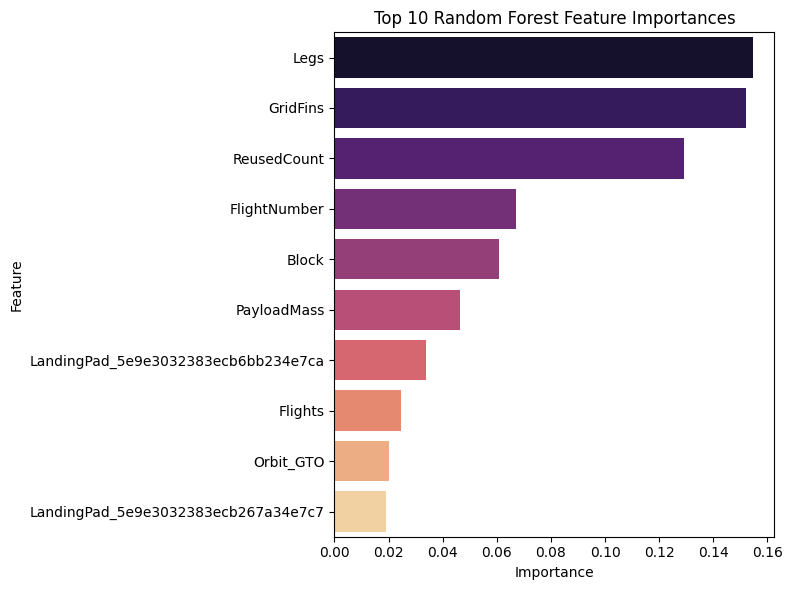

In [13]:
importances = rf_cv.best_estimator_.feature_importances_
rf_imp_df = pd.DataFrame({"Feature": X.columns, "Importance": importances})
top_rf_df = rf_imp_df.sort_values(by="Importance", ascending=False).head(10)

plt.figure(figsize=(8,6))
sns.barplot(x="Importance", y="Feature", data=top_rf_df, palette="magma")
plt.title("Top 10 Random Forest Feature Importances")
plt.tight_layout()
plt.show()

## 13. ROC Curves

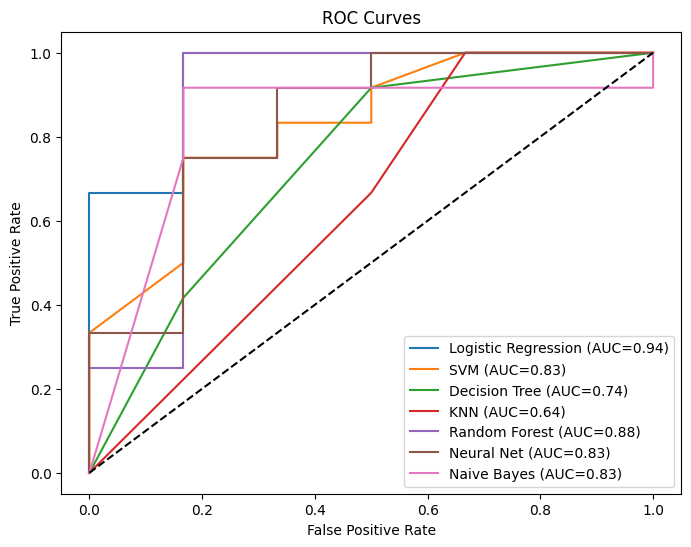

In [14]:
plt.figure(figsize=(8,6))
for name, model in models.items():
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(Y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(Y_test, y_prob):.2f})")

plt.plot([0,1], [0,1], "k--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.show()

## 14. Conclusion

### Model Performance
- Logistic Regression and Random Forest both performed well, achieving test accuracies of approximately **0.83**.  
- Logistic Regression achieved the highest ROC AUC (**0.94**), slightly outperforming Random Forest (**0.88**).  

### Feature Importance Insights
- Feature importance analysis indicates that **Legs**, **GridFins**, and **ReusedCount** are the most influential predictors of landing success.  
- Logistic Regression emphasized **booster serials** and landing pad IDs, which may reflect historical patterns but have limited generalizability.  
- Random Forest highlighted **mission-level features** such as *Flight Number*, *Block*, and *Payload Mass*, providing more robust insights into landing outcomes.  

### Limitations
- The evaluation is based on a **very small test set (18 samples)**; results should therefore be interpreted with caution.  

### Next Steps
- Gather additional launch records to reduce variance and improve model evaluation reliability.  
- Consider **dropping booster serial features** to avoid overfitting and focus on generalizable predictors.  
- Explore ensemble methods or further hyperparameter tuning for Random Forest.  
- Deploy the best-performing model (currently Logistic Regression or Random Forest) as a predictive tool for estimating booster landing success.



## 15. Deployment Example: Saving and Using the Model

In [15]:
import joblib

# Save the best-performing model (Logistic Regression here)
best_model = logreg_cv.best_estimator_
joblib.dump(best_model, "spacex_logreg_model.pkl")

print("Model saved as spacex_logreg_model.pkl")

# Example function to predict booster landing success
def predict_success(features, model_path="spacex_logreg_model.pkl"):
    """
    Predict booster landing success.

    Parameters:
        features (list or np.array): Feature vector for a single launch (same order as training set).
        model_path (str): Path to saved model file.

    Returns:
        str: "Landed" or "Did not land"
        float: Probability of landing success
    """
    # Load model
    model = joblib.load(model_path)

    # Ensure input is 2D
    features = np.array(features).reshape(1, -1)

    # Predict
    prob = model.predict_proba(features)[0,1]
    pred = model.predict(features)[0]

    return ("Landed" if pred == 1 else "Did not land", prob)

# Example usage (with dummy input vector matching feature dimensions)
dummy_input = X.iloc[0].values  # take first row of features as example
prediction, probability = predict_success(dummy_input)

print(f"Prediction: {prediction}, Probability: {probability:.2f}")



Model saved as spacex_logreg_model.pkl
Prediction: Landed, Probability: 1.00
